<a href="https://colab.research.google.com/github/18ME10049/Projects/blob/master/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [133]:
data = pd.read_csv("train_ctrUa4K.csv")

In [135]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [136]:
data.info()
print(len(data))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
614


In [73]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [74]:
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].mean())
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].mean())

In [75]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [76]:
data['Gender'].mode()

0    Male
dtype: object

In [77]:
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])
data['Married']=data['Married'].fillna(data['Married'].mode()[0])
data['Dependents']=data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [78]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [79]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [80]:
data.Dependents.describe()

count     614
unique      4
top         0
freq      360
Name: Dependents, dtype: object

In [81]:
from sklearn.impute import SimpleImputer
imputer1 = SimpleImputer(missing_values=np.nan , strategy = 'mean')
imputer2 = SimpleImputer(missing_values=np.nan , strategy='most_frequent')

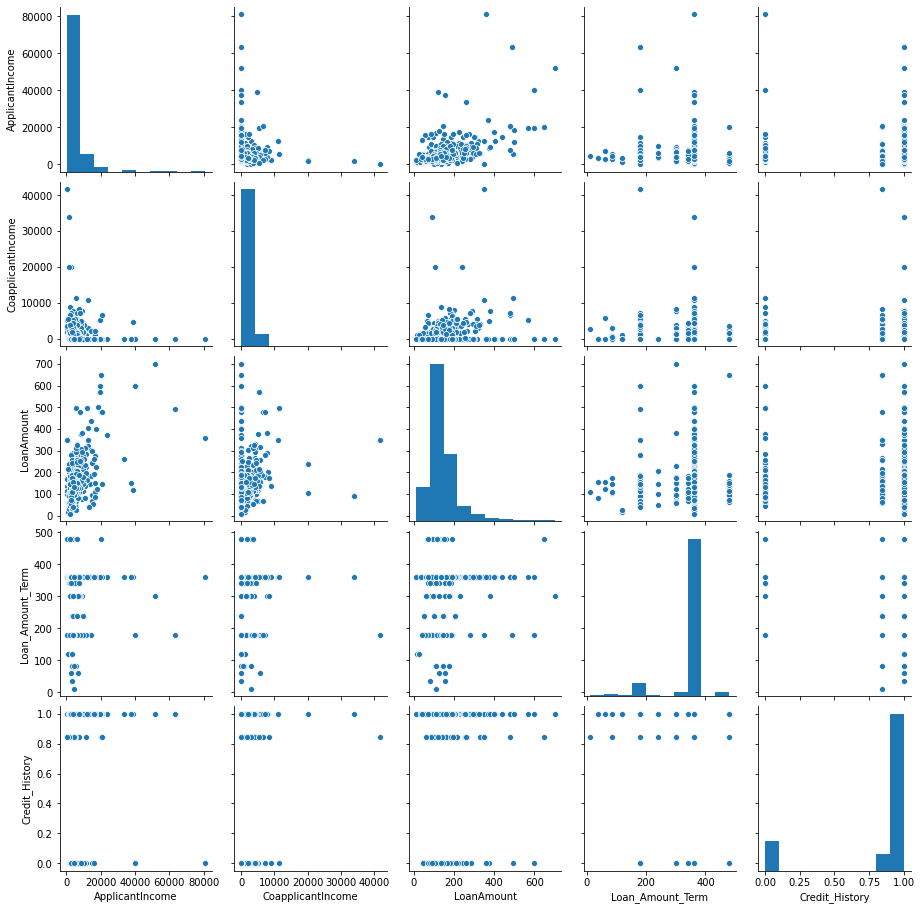

In [82]:
sns.pairplot(data=data)

In [83]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


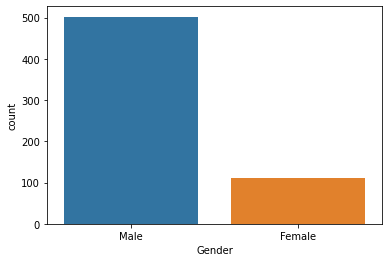

In [84]:
sns.countplot(data['Gender'])

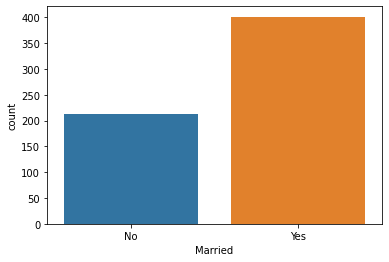

In [85]:
sns.countplot(data['Married'])

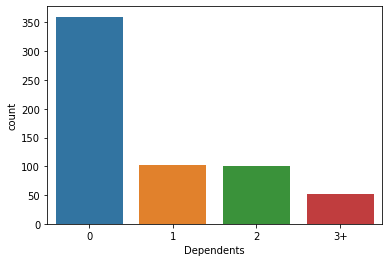

In [86]:
sns.countplot(data['Dependents'])

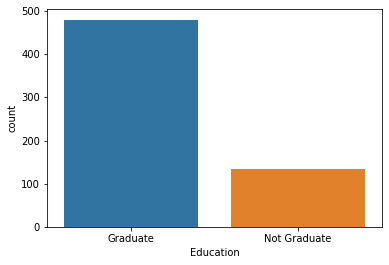

In [87]:
sns.countplot(data['Education'])

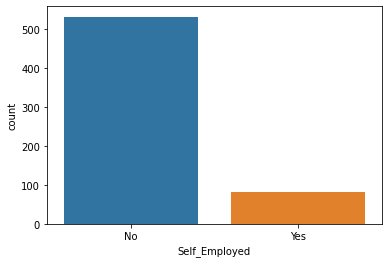

In [88]:
sns.countplot(data['Self_Employed'])

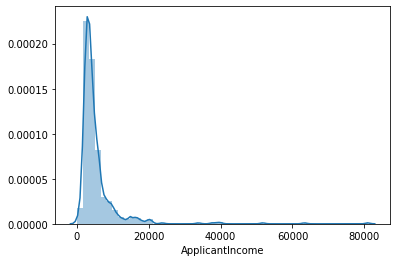

In [89]:
sns.distplot(data['ApplicantIncome'])

In [90]:
data['TotalIncome'] = data['ApplicantIncome'] + data['CoapplicantIncome']

In [91]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


In [92]:
cols = ['Loan_ID' , 'CoapplicantIncome']
data = data.drop(columns=cols)

In [93]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,Male,No,0,Graduate,No,5849,146.412162,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,4583,128.000000,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,3000,66.000000,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,2583,120.000000,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,6000,141.000000,360.0,1.0,Urban,Y,6000.0


In [94]:
data['TotalIncome'] = np.log(data['TotalIncome'])

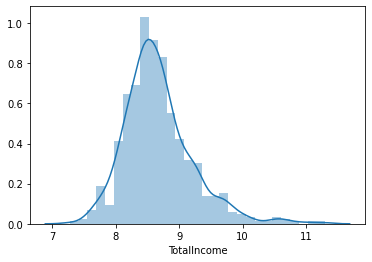

In [95]:
sns.distplot(data['TotalIncome'])

In [96]:
data['LoanAmount'][0] = 120
data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,Male,No,0,Graduate,No,5849,120.0,360.0,1.0,Urban,Y,8.674026
1,Male,Yes,1,Graduate,No,4583,128.0,360.0,1.0,Rural,N,8.714568
2,Male,Yes,0,Graduate,Yes,3000,66.0,360.0,1.0,Urban,Y,8.006368
3,Male,Yes,0,Not Graduate,No,2583,120.0,360.0,1.0,Urban,Y,8.505323
4,Male,No,0,Graduate,No,6000,141.0,360.0,1.0,Urban,Y,8.699515


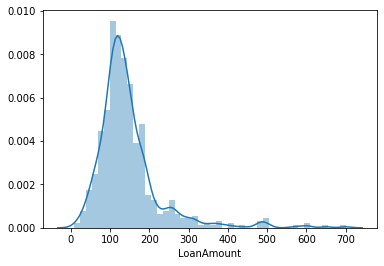

In [97]:
sns.distplot(data['LoanAmount'])

In [98]:
data['LoanAmount'] = np.log(data['LoanAmount'])

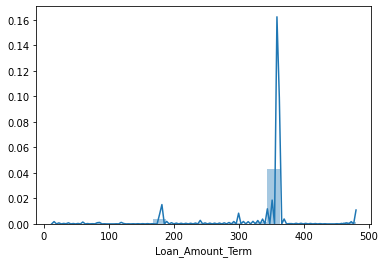

In [99]:
sns.distplot(data['Loan_Amount_Term'])

In [100]:
data['Loan_Amount_Term'] = np.log(data['Loan_Amount_Term'])


In [101]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,Male,No,0,Graduate,No,5849,4.787492,5.886104,1.0,Urban,Y,8.674026
1,Male,Yes,1,Graduate,No,4583,4.852030,5.886104,1.0,Rural,N,8.714568
2,Male,Yes,0,Graduate,Yes,3000,4.189655,5.886104,1.0,Urban,Y,8.006368
3,Male,Yes,0,Not Graduate,No,2583,4.787492,5.886104,1.0,Urban,Y,8.505323
4,Male,No,0,Graduate,No,6000,4.948760,5.886104,1.0,Urban,Y,8.699515


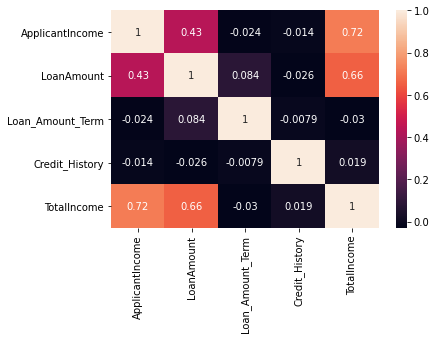

In [102]:
corr = data.corr()
sns.heatmap(corr , annot=True)

In [103]:
data['ApplicantIncome'] = np.log(data['ApplicantIncome'])

In [104]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender' ,'Married' ,'Education' , 'Self_Employed' , 'Property_Area' , 'Loan_Status' , 'Dependents']
le = LabelEncoder()
for col in cols:
   data[col] = le.fit_transform(data[col])

In [105]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1,0,0,0,0,8.674026,4.787492,5.886104,1.0,2,1,8.674026
1,1,1,1,0,0,8.430109,4.852030,5.886104,1.0,0,0,8.714568
2,1,1,0,0,1,8.006368,4.189655,5.886104,1.0,2,1,8.006368
3,1,1,0,1,0,7.856707,4.787492,5.886104,1.0,2,1,8.505323
4,1,0,0,0,0,8.699515,4.948760,5.886104,1.0,2,1,8.699515


**Perform Various Model**

In [106]:
X = data.drop(columns='Loan_Status' , axis=1)
Y = data['Loan_Status']

In [107]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
0,1,0,0,0,0,8.674026,4.787492,5.886104,1.0,2,8.674026
1,1,1,1,0,0,8.430109,4.852030,5.886104,1.0,0,8.714568
2,1,1,0,0,1,8.006368,4.189655,5.886104,1.0,2,8.006368
3,1,1,0,1,0,7.856707,4.787492,5.886104,1.0,2,8.505323
4,1,0,0,0,0,8.699515,4.948760,5.886104,1.0,2,8.699515
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,7.972466,4.262680,5.886104,1.0,0,7.972466
610,1,1,3,0,0,8.320205,3.688879,5.192957,1.0,0,8.320205
611,1,1,1,0,0,8.996157,5.533389,5.886104,1.0,2,9.025456
612,1,1,2,0,0,8.933664,5.231109,5.886104,1.0,2,8.933664


In [108]:
Y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [127]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X , Y  , test_size = 0.25 , random_state=3)

In [120]:
#classify function
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

def classify(model, X, Y):
    x_train , x_test  ,y_train , y_test = train_test_split(X , Y  , test_size = 0.25 , random_state=3)
    model.fit(x_train , y_train)
    y_pred = classifier.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    #print(cm)
    print(accuracy_score(y_test, y_pred))  

In [132]:

from sklearn.linear_model import LogisticRegression
classfier = LogisticRegression()
classfier.fit(x_train , y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

ValueError: ignored

In [121]:
from sklearn.linear_model import LogisticRegression
classfier = LogisticRegression()

classify(classifier,X , Y)

0.8506493506493507


In [122]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classify(classifier,X , Y)

0.7142857142857143


In [123]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classify(classifier,X , Y)

0.8376623376623377


In [124]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classify(classifier,X , Y)

0.8441558441558441


In [118]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classify(classifier,X , Y)

[[21 12]
 [23 98]]


In [125]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classify(classifier,X , Y)

0.8506493506493507
